# Getting data from sneaker database

 ## Abstract
 We are working on sneaker database. There would be three data source, the api, web scraper and csv file. Then, we would develop a database based on these data and form the Entity-Relationship diagram.

### DATA

Data have several fields below:
NAME
BRAND
STYLE ID
COLORWAY
GENDER
RETAIL PRICE
RELEASE YEAR

### Importing Libraries

In [1]:
import requests
import pandas as pd
import json
import os
import time
from selenium import webdriver

### Data source 1: api

In [6]:
# First initiate two empty list for storing the raw data
rawSneakerJsonData = []
BestSneakers = []

getBestSneakerRequest = 'https://api.thesneakerdatabase.com/v1/sneakers?limit=50' + '&page=' 

In [7]:
print(getBestSneakerRequest)

https://api.thesneakerdatabase.com/v1/sneakers?limit=50&page=


In [8]:
    for page in range(1, 41):
        SneakerData = requests.get(getBestSneakerRequest  + str(page))
        rawSneakerJsonData.append(SneakerData.json())
        BestSneakers += SneakerData.json()['results']
        time.sleep(0.1)
#     print(BestSneakers)

In [9]:
SneakerData.json()

{'count': 25572,
 'results': [{'id': 'e81a2d0b-de60-4903-b1b5-077f3b199db6',
   'brand': 'adidas',
   'colorway': 'White/Solar Yellow/Ash Grey',
   'gender': 'men',
   'media': {'imageUrl': 'https://stockx.imgix.net/adidas-ZX-Torsion-Footpatrol.png?fit=fill&bg=FFFFFF&w=700&h=500&auto=format,compress&trim=color&q=90&dpr=2&updated_at=1566496097',
    'smallImageUrl': 'https://stockx.imgix.net/adidas-ZX-Torsion-Footpatrol.png?fit=fill&bg=FFFFFF&w=300&h=214&auto=format,compress&trim=color&q=90&dpr=2&updated_at=1566496097',
    'thumbUrl': 'https://stockx.imgix.net/adidas-ZX-Torsion-Footpatrol.png?fit=fill&bg=FFFFFF&w=140&h=100&auto=format,compress&trim=color&q=90&dpr=2&updated_at=1566496097'},
   'releaseDate': '2019-09-11 23:59:59',
   'retailPrice': 150,
   'styleId': 'EF7681',
   'title': 'adidas ZX Torsion Footpatrol',
   'year': 2019},
  {'id': '20b30bcf-7ed2-4a71-9baf-2823d952b492',
   'brand': 'Nike',
   'colorway': 'College Navy/University Red-White-Chrome',
   'gender': 'men',
   

In [10]:
rawSneakerJsonData[0]

{'count': 25572,
 'results': [{'id': 'fa1188b1-a369-41b4-9eae-57bb00142bc4',
   'brand': 'Reebok',
   'colorway': 'Grey/Yellow-Black-Green',
   'gender': 'toddler',
   'media': {'imageUrl': '', 'smallImageUrl': '', 'thumbUrl': ''},
   'releaseDate': '2020-02-15 23:59:59',
   'retailPrice': 50,
   'styleId': None,
   'title': 'Reebok Instapump Fury Tom & Jerry (TD)',
   'year': 2020},
  {'id': '45796c19-ba46-49ae-8da0-d7dbe0164a4d',
   'brand': 'Nike',
   'colorway': 'Bright Blue/Metallic Gold-University Red',
   'gender': 'men',
   'media': {'imageUrl': '', 'smallImageUrl': '', 'thumbUrl': ''},
   'releaseDate': '2020-02-15 23:59:59',
   'retailPrice': None,
   'styleId': None,
   'title': 'Air Force 1 High Just Don Blue',
   'year': 2020},
  {'id': '9c076e7d-0183-441b-90c9-e8442a41ca79',
   'brand': 'Jordan',
   'colorway': 'Fire Red/Fire Red-Cement Grey-Black',
   'gender': 'men',
   'media': {'imageUrl': 'https://stockx.imgix.net/Air-Jordan-3-Retro-SE-Fire-Red-Product-Back.jpg?fit=f

In [11]:
BestSneakers[0]

{'id': 'fa1188b1-a369-41b4-9eae-57bb00142bc4',
 'brand': 'Reebok',
 'colorway': 'Grey/Yellow-Black-Green',
 'gender': 'toddler',
 'media': {'imageUrl': '', 'smallImageUrl': '', 'thumbUrl': ''},
 'releaseDate': '2020-02-15 23:59:59',
 'retailPrice': 50,
 'styleId': None,
 'title': 'Reebok Instapump Fury Tom & Jerry (TD)',
 'year': 2020}

In [12]:
selectedColumns = ['id', 'brand', 'colorway', 'gender', 'releaseDate','retailPrice','title','year' ]
sneakerDataFrame = pd.DataFrame(BestSneakers, columns = selectedColumns)
sneakerDataFrame.describe()
print(sneakerDataFrame)

                                        id         brand  \
0     fa1188b1-a369-41b4-9eae-57bb00142bc4        Reebok   
1     45796c19-ba46-49ae-8da0-d7dbe0164a4d          Nike   
2     9c076e7d-0183-441b-90c9-e8442a41ca79        Jordan   
3     c24cd262-21b0-447a-bbd6-6f1ce15be54c        adidas   
4     077f3a26-5464-45ca-8c6e-ecf16ed579e7        adidas   
...                                    ...           ...   
1995  1fd1556d-b144-4aee-a7fb-96c30dde87f8   New Balance   
1996  7c067038-2a8a-4070-a653-7dcaa033460d         Asics   
1997  c88a49ac-2704-4d64-ae1a-197e0cad277b         Asics   
1998  01e45fa9-209b-40f9-b30f-4777318e09cf         Asics   
1999  854c9dd0-6916-4a67-8834-206cf0c1a8ec  Under Armour   

                                      colorway   gender          releaseDate  \
0                      Grey/Yellow-Black-Green  toddler  2020-02-15 23:59:59   
1     Bright Blue/Metallic Gold-University Red      men  2020-02-15 23:59:59   
2          Fire Red/Fire Red-Cement Gre

In [13]:
sneakerDataFrame.isnull().any()

id             False
brand          False
colorway       False
gender         False
releaseDate    False
retailPrice     True
title          False
year           False
dtype: bool

In [14]:
sneakerDataFrame.dropna(axis=0, how='any', inplace=True)

In [15]:
sneakerDataFrame.isnull().any()

id             False
brand          False
colorway       False
gender         False
releaseDate    False
retailPrice    False
title          False
year           False
dtype: bool

In [16]:
sneakerDataFrame.shape

(1694, 8)

In [17]:
sneakerDataFrame.columns

Index(['id', 'brand', 'colorway', 'gender', 'releaseDate', 'retailPrice',
       'title', 'year'],
      dtype='object')

In [18]:
sneakerDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1694 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1694 non-null   object 
 1   brand        1694 non-null   object 
 2   colorway     1694 non-null   object 
 3   gender       1694 non-null   object 
 4   releaseDate  1694 non-null   object 
 5   retailPrice  1694 non-null   float64
 6   title        1694 non-null   object 
 7   year         1694 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 119.1+ KB


# Data visualization

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [20]:
sneakerDataFrame.shape

(1694, 8)

In [21]:
sneakerDataFrame.columns

Index(['id', 'brand', 'colorway', 'gender', 'releaseDate', 'retailPrice',
       'title', 'year'],
      dtype='object')

In [22]:
sneakerDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1694 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1694 non-null   object 
 1   brand        1694 non-null   object 
 2   colorway     1694 non-null   object 
 3   gender       1694 non-null   object 
 4   releaseDate  1694 non-null   object 
 5   retailPrice  1694 non-null   float64
 6   title        1694 non-null   object 
 7   year         1694 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 119.1+ KB


# Data visualization

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

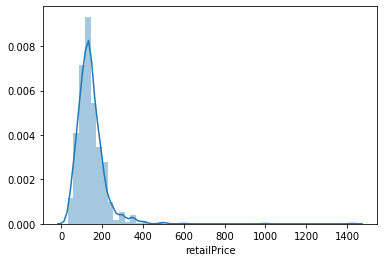

In [24]:
x = sneakerDataFrame['retailPrice']
sns.distplot(x)

The above graph shows that the mean price of the sneakers is around 100 dollars. 

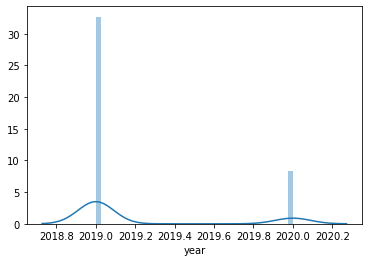

In [25]:
y = sneakerDataFrame['year']
sns.distplot(y)

From the above graph we could see that from this database, there are two years the shoes are released, one is from year 2019, another is from yesr 2020.

In [26]:
x

0        50.0
2       200.0
3       200.0
6       160.0
8       200.0
        ...  
1992    150.0
1993    300.0
1994    200.0
1995    300.0
1999    110.0
Name: retailPrice, Length: 1694, dtype: float64

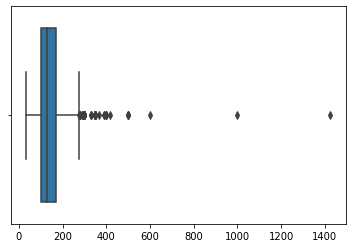

In [28]:
sns.boxplot(np.array(sneakerDataFrame['retailPrice']))

The above graph also shows that most of the retail price of shoes of sneakerdataframe database is 100 dollars.

In [29]:
sneakerDataFrame

,id,brand,colorway,gender,releaseDate,retailPrice,title,year
0,fa1188b1-a369-41b4-9eae-57bb00142bc4,Reebok,Grey/Yellow-Black-Green,toddler,2020-02-15 23:59:59,50.0,Reebok Instapump Fury Tom & Jerry (TD),2020
2,9c076e7d-0183-441b-90c9-e8442a41ca79,Jordan,Fire Red/Fire Red-Cement Grey-Black,men,2020-02-15 23:59:59,200.0,Jordan 3 Retro SE Fire Red,2020
3,c24cd262-21b0-447a-bbd6-6f1ce15be54c,adidas,Alvah/Alvah/Alvah,men,2020-02-15 23:59:59,200.0,adidas Yeezy Boost 700 V3 Alvah,2020
6,01e9e424-1d1d-4d04-8697-7a7c3d0112c0,Nike,Multi-Color/Multi-Color,men,2020-02-15 23:59:59,160.0,KD 12 Don C,2020
8,97d6372f-a115-44a8-96eb-f554dfe6fec6,Jordan,Varsity Red/Varsity Red-Cement Grey,men,2020-02-15 23:59:59,200.0,Jordan 3 Retro Fire Red Cement (Nike Chi),2020
...,...,...,...,...,...,...,...,...
1992,cdec2ea1-2919-422b-b571-9ced060531d4,Nike,Electro Green/Yellow Ochre-Obsidian,men,2019-09-06 23:59:59,150.0,Air Max 720 React Electro Green,2019
1993,6f249353-515f-4c5a-a0d0-47ecf6ebe64e,Jordan,Gym Red/Bright Crimson-Metallic Gold,women,2019-09-06 23:59:59,300.0,Jordan Air Latitude 720 LX Gym Red (W),2019
1994,71025ba2-bd70-40fe-8474-2800135822c0,New Balance,Grey/Red,men,2019-09-06 23:59:59,200.0,New Balance 990 V5 YCMC Loyalty,2019
1995,1fd1556d-b144-4aee-a7fb-96c30dde87f8,New Balance,Brown,men,2019-09-06 23:59:59,300.0,New Balance 997 Red Wing,2019


In [30]:
sneakerDataFrame.to_csv("sneaker.csv",encoding="utf-8",index=False)

In [31]:
sneakerDataFrame.head()

,id,brand,colorway,gender,releaseDate,retailPrice,title,year
0,fa1188b1-a369-41b4-9eae-57bb00142bc4,Reebok,Grey/Yellow-Black-Green,toddler,2020-02-15 23:59:59,50.0,Reebok Instapump Fury Tom & Jerry (TD),2020
2,9c076e7d-0183-441b-90c9-e8442a41ca79,Jordan,Fire Red/Fire Red-Cement Grey-Black,men,2020-02-15 23:59:59,200.0,Jordan 3 Retro SE Fire Red,2020
3,c24cd262-21b0-447a-bbd6-6f1ce15be54c,adidas,Alvah/Alvah/Alvah,men,2020-02-15 23:59:59,200.0,adidas Yeezy Boost 700 V3 Alvah,2020
6,01e9e424-1d1d-4d04-8697-7a7c3d0112c0,Nike,Multi-Color/Multi-Color,men,2020-02-15 23:59:59,160.0,KD 12 Don C,2020
8,97d6372f-a115-44a8-96eb-f554dfe6fec6,Jordan,Varsity Red/Varsity Red-Cement Grey,men,2020-02-15 23:59:59,200.0,Jordan 3 Retro Fire Red Cement (Nike Chi),2020


In [32]:
sneakerDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1694 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1694 non-null   object 
 1   brand        1694 non-null   object 
 2   colorway     1694 non-null   object 
 3   gender       1694 non-null   object 
 4   releaseDate  1694 non-null   object 
 5   retailPrice  1694 non-null   float64
 6   title        1694 non-null   object 
 7   year         1694 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 119.1+ KB


In [33]:
sneakerDataFrame.isnull().any()

id             False
brand          False
colorway       False
gender         False
releaseDate    False
retailPrice    False
title          False
year           False
dtype: bool

In [34]:
sneakerDataFrame.isnull().sum()

id             0
brand          0
colorway       0
gender         0
releaseDate    0
retailPrice    0
title          0
year           0
dtype: int64

In [35]:
sneakerDataFrame['brand']

0             Reebok
2             Jordan
3             adidas
6               Nike
8             Jordan
            ...     
1992            Nike
1993          Jordan
1994     New Balance
1995     New Balance
1999    Under Armour
Name: brand, Length: 1694, dtype: object

In [36]:
sneakerDataFrame.shape

(1694, 8)

In [37]:
sneakerDataFrame.columns

Index(['id', 'brand', 'colorway', 'gender', 'releaseDate', 'retailPrice',
       'title', 'year'],
      dtype='object')

# DATASOURCE -Using Beautifulsoup to scrape

In [2]:
import requests
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import csv

In [4]:
 


driver = webdriver.Chrome()
driver.get('http://www.thesneakerdatabase.com/')
python_button = driver.find_elements_by_xpath('//*[@id="root"]/div/div[2]/div/div/div[1]/div/button')[0]
python_button.click()
time.sleep(7)

with open('test1.csv','w') as f:

    writer = csv.writer(f)
    writer.writerow(['NAME','BRAND','STYLE ID','COLORWAY','GENDER','RETAIL PRICE','RELEASE YEAR'])
#     writer.writerow(temp)
    time.sleep(2)
    
    for num in range(0,20):
        time.sleep(3)
        for cnt in range(0,5):
            count = str(cnt + 1)
            t1 = driver.find_elements_by_xpath('//*[@id="root"]/div/div[2]/div/div/div[2]/div/div/table/tbody/tr[' + count + ']/td[2]')[0].text
            t2 = driver.find_elements_by_xpath('//*[@id="root"]/div/div[2]/div/div/div[2]/div/div/table/tbody/tr[' + count + ']/td[3]')[0].text
            t3 = driver.find_elements_by_xpath('//*[@id="root"]/div/div[2]/div/div/div[2]/div/div/table/tbody/tr[' + count + ']/td[4]')[0].text
            t4 = driver.find_elements_by_xpath('//*[@id="root"]/div/div[2]/div/div/div[2]/div/div/table/tbody/tr[' + count + ']/td[5]')[0].text
            t5 = driver.find_elements_by_xpath('//*[@id="root"]/div/div[2]/div/div/div[2]/div/div/table/tbody/tr[' + count + ']/td[6]')[0].text
            t6 = driver.find_elements_by_xpath('//*[@id="root"]/div/div[2]/div/div/div[2]/div/div/table/tbody/tr[' + count + ']/td[7]')[0].text
            t7 = driver.find_elements_by_xpath('//*[@id="root"]/div/div[2]/div/div/div[2]/div/div/table/tbody/tr[' + count + ']/td[8]')[0].text
        
            templist = []
            templist.append(t1)
            templist.append(t2)
            templist.append(t3)
            templist.append(t4)
            templist.append(t5)
            templist.append(t6)
            templist.append(t7)
        
            writer.writerow(templist)

            time.sleep(1)

            print (t1)
            print (t2)
            print (t3)
            print (t4)
            print (t5)
            print (t6)
            print (t7)
            time.sleep(1)
    
        python_button1 = driver.find_elements_by_xpath('//*[@id="root"]/div/div[2]/div/div/div[2]/div/div/table/tfoot/tr/td/div/div[3]/button[3]')[0]
        python_button1.click()
        time.sleep(3)
f.close()
driver.close()




Jordan XXXII Low Last Shot
Jordan
AA1256-003
Black/Gym Red-Tour Yellow
men
160
2018
Jordan 13 Retro Carmelo Anthony Class Of 2002 (GS)
Jordan
884129-035
Black/University Red-University Gold
child
140
2018
Jordan 1 Rebel XX Cinder Orange (W)
Jordan
AO1530-800
Cinder Orange/Cinder Orange
women
145
2018
Jordan 13 Retro Metal Cleat Black
Jordan
AR4476-001
Black/White-White
men
120
2018
Jordan 1 Retro Low Black Gold Patent (GS)
Jordan
554723-032
Black/Metallic Gold-White
child
80
2018
Jordan XXXII Low Gordon St.
Jordan
AA1256-004
Light Bone/Black-Vachetta Tan-Infrared
men
160
2018
Jordan 8 Retro South Beach (GS)
Jordan
305368-113
White/White-Turbo Green-Neutral Grey
child
140
2018
Jordan 1 Jester XX Geode Teal (W)
Jordan
AO1265-300
Geode Teal/Geode Teal
women
160
2018
Jordan 1 Retro Low NS White (W)
Jordan
AH7232-100
White/White-Metallic Gold
women
110
2018
Jordan Why Not Zer0.1 UNC
Jordan
AA2510-402
University Blue/White
men
125
2018
Jordan 10 Retro Black Fuchsia Black (GS)
Jordan
487211-0

Jordan 13 Retro Golf White Navy Blue
Jordan
917719-100
White/Navy Blue
men
175
2017
Jordan 1 Retro All Star 2017 "Chameleon" (GS)
Jordan
907959-015
Black/Black-Metallic Silver
child
140
2017
Jordan 3 Retro Golf White Cement
Jordan
AJ3783-100
White/Black
men
200
2017
Jordan 1 Retro High Aleali May Shadow
Jordan
AJ5991-062
Black/Shadow Grey-White
men
160
2017
Jordan 1 Retro Golf Cleat Chicago
Jordan
917717-100
White/Black-Varsity Red
men
200
2017
Jordan 1 Retro High Rust Pink
Jordan
861428-101
White/Black-Rust Pink
men
160
2017
Jordan 5 Retro Fab Five PE
Jordan
h013mnjdls535747480
Amarillo/Black
men

2017
Jordan Horizon Low Wolf Grey (GS)
Jordan
846365-018
Wolf Grey/Black-White
child
120
2017
Jordan Spizike Black Varsity Red 2017 (PS)
Jordan
317700-026
Black/Varsity Red-Classic Green
preschool
80
2017
Jordan True Flight Golden Harvest (TD)
Jordan
343797-725
Golden Harvest/Golden Harvest-Sail
toddler
55
2017
Jordan 6 Retro White Hyper Jade Black (PS)
Jordan
384666-122
White/White-Hyper Ja

In [ ]:
## Conceptual Model

### Generating tables by reforming data

In [38]:
Sneaker_title = sneakerDataFrame.iloc[:,:8]
Sneaker_title

,id,brand,colorway,gender,releaseDate,retailPrice,title,year
0,fa1188b1-a369-41b4-9eae-57bb00142bc4,Reebok,Grey/Yellow-Black-Green,toddler,2020-02-15 23:59:59,50.0,Reebok Instapump Fury Tom & Jerry (TD),2020
2,9c076e7d-0183-441b-90c9-e8442a41ca79,Jordan,Fire Red/Fire Red-Cement Grey-Black,men,2020-02-15 23:59:59,200.0,Jordan 3 Retro SE Fire Red,2020
3,c24cd262-21b0-447a-bbd6-6f1ce15be54c,adidas,Alvah/Alvah/Alvah,men,2020-02-15 23:59:59,200.0,adidas Yeezy Boost 700 V3 Alvah,2020
6,01e9e424-1d1d-4d04-8697-7a7c3d0112c0,Nike,Multi-Color/Multi-Color,men,2020-02-15 23:59:59,160.0,KD 12 Don C,2020
8,97d6372f-a115-44a8-96eb-f554dfe6fec6,Jordan,Varsity Red/Varsity Red-Cement Grey,men,2020-02-15 23:59:59,200.0,Jordan 3 Retro Fire Red Cement (Nike Chi),2020
...,...,...,...,...,...,...,...,...
1992,cdec2ea1-2919-422b-b571-9ced060531d4,Nike,Electro Green/Yellow Ochre-Obsidian,men,2019-09-06 23:59:59,150.0,Air Max 720 React Electro Green,2019
1993,6f249353-515f-4c5a-a0d0-47ecf6ebe64e,Jordan,Gym Red/Bright Crimson-Metallic Gold,women,2019-09-06 23:59:59,300.0,Jordan Air Latitude 720 LX Gym Red (W),2019
1994,71025ba2-bd70-40fe-8474-2800135822c0,New Balance,Grey/Red,men,2019-09-06 23:59:59,200.0,New Balance 990 V5 YCMC Loyalty,2019
1995,1fd1556d-b144-4aee-a7fb-96c30dde87f8,New Balance,Brown,men,2019-09-06 23:59:59,300.0,New Balance 997 Red Wing,2019


In [39]:
retailPrice = sneakerDataFrame.loc[:,['title','releaseDate','retailPrice']]
retailPrice

,title,releaseDate,retailPrice
0,Reebok Instapump Fury Tom & Jerry (TD),2020-02-15 23:59:59,50.0
2,Jordan 3 Retro SE Fire Red,2020-02-15 23:59:59,200.0
3,adidas Yeezy Boost 700 V3 Alvah,2020-02-15 23:59:59,200.0
6,KD 12 Don C,2020-02-15 23:59:59,160.0
8,Jordan 3 Retro Fire Red Cement (Nike Chi),2020-02-15 23:59:59,200.0
...,...,...,...
1992,Air Max 720 React Electro Green,2019-09-06 23:59:59,150.0
1993,Jordan Air Latitude 720 LX Gym Red (W),2019-09-06 23:59:59,300.0
1994,New Balance 990 V5 YCMC Loyalty,2019-09-06 23:59:59,200.0
1995,New Balance 997 Red Wing,2019-09-06 23:59:59,300.0


In [40]:
colorway = sneakerDataFrame.loc[:,['title','colorway','brand']]
colorway

,title,colorway,brand
0,Reebok Instapump Fury Tom & Jerry (TD),Grey/Yellow-Black-Green,Reebok
2,Jordan 3 Retro SE Fire Red,Fire Red/Fire Red-Cement Grey-Black,Jordan
3,adidas Yeezy Boost 700 V3 Alvah,Alvah/Alvah/Alvah,adidas
6,KD 12 Don C,Multi-Color/Multi-Color,Nike
8,Jordan 3 Retro Fire Red Cement (Nike Chi),Varsity Red/Varsity Red-Cement Grey,Jordan
...,...,...,...
1992,Air Max 720 React Electro Green,Electro Green/Yellow Ochre-Obsidian,Nike
1993,Jordan Air Latitude 720 LX Gym Red (W),Gym Red/Bright Crimson-Metallic Gold,Jordan
1994,New Balance 990 V5 YCMC Loyalty,Grey/Red,New Balance
1995,New Balance 997 Red Wing,Brown,New Balance


In [41]:
gender = sneakerDataFrame.loc[:,['title','id','gender']]
gender 

,title,id,gender
0,Reebok Instapump Fury Tom & Jerry (TD),fa1188b1-a369-41b4-9eae-57bb00142bc4,toddler
2,Jordan 3 Retro SE Fire Red,9c076e7d-0183-441b-90c9-e8442a41ca79,men
3,adidas Yeezy Boost 700 V3 Alvah,c24cd262-21b0-447a-bbd6-6f1ce15be54c,men
6,KD 12 Don C,01e9e424-1d1d-4d04-8697-7a7c3d0112c0,men
8,Jordan 3 Retro Fire Red Cement (Nike Chi),97d6372f-a115-44a8-96eb-f554dfe6fec6,men
...,...,...,...
1992,Air Max 720 React Electro Green,cdec2ea1-2919-422b-b571-9ced060531d4,men
1993,Jordan Air Latitude 720 LX Gym Red (W),6f249353-515f-4c5a-a0d0-47ecf6ebe64e,women
1994,New Balance 990 V5 YCMC Loyalty,71025ba2-bd70-40fe-8474-2800135822c0,men
1995,New Balance 997 Red Wing,1fd1556d-b144-4aee-a7fb-96c30dde87f8,men


### Generating CSV files (Exporting the files to the PC

In [42]:
Sneaker_title.to_csv("Sneaker_title.csv",encoding="utf-8",index=False)

In [43]:
Sneaker_title = pd.read_csv("Sneaker_title.csv")

In [44]:
Sneaker_title.head()

,id,brand,colorway,gender,releaseDate,retailPrice,title,year
0,fa1188b1-a369-41b4-9eae-57bb00142bc4,Reebok,Grey/Yellow-Black-Green,toddler,2020-02-15 23:59:59,50.0,Reebok Instapump Fury Tom & Jerry (TD),2020
1,9c076e7d-0183-441b-90c9-e8442a41ca79,Jordan,Fire Red/Fire Red-Cement Grey-Black,men,2020-02-15 23:59:59,200.0,Jordan 3 Retro SE Fire Red,2020
2,c24cd262-21b0-447a-bbd6-6f1ce15be54c,adidas,Alvah/Alvah/Alvah,men,2020-02-15 23:59:59,200.0,adidas Yeezy Boost 700 V3 Alvah,2020
3,01e9e424-1d1d-4d04-8697-7a7c3d0112c0,Nike,Multi-Color/Multi-Color,men,2020-02-15 23:59:59,160.0,KD 12 Don C,2020
4,97d6372f-a115-44a8-96eb-f554dfe6fec6,Jordan,Varsity Red/Varsity Red-Cement Grey,men,2020-02-15 23:59:59,200.0,Jordan 3 Retro Fire Red Cement (Nike Chi),2020


In [45]:
retailPrice.to_csv("retailPrice.csv",encoding="utf-8",index=False)
retailPrice = pd.read_csv("retailPrice.csv")
retailPrice.head()

,title,releaseDate,retailPrice
0,Reebok Instapump Fury Tom & Jerry (TD),2020-02-15 23:59:59,50.0
1,Jordan 3 Retro SE Fire Red,2020-02-15 23:59:59,200.0
2,adidas Yeezy Boost 700 V3 Alvah,2020-02-15 23:59:59,200.0
3,KD 12 Don C,2020-02-15 23:59:59,160.0
4,Jordan 3 Retro Fire Red Cement (Nike Chi),2020-02-15 23:59:59,200.0


In [46]:
colorway.to_csv("colorway.csv",encoding="utf-8",index=False)
colorway = pd.read_csv("colorway.csv")
colorway.head()

,title,colorway,brand
0,Reebok Instapump Fury Tom & Jerry (TD),Grey/Yellow-Black-Green,Reebok
1,Jordan 3 Retro SE Fire Red,Fire Red/Fire Red-Cement Grey-Black,Jordan
2,adidas Yeezy Boost 700 V3 Alvah,Alvah/Alvah/Alvah,adidas
3,KD 12 Don C,Multi-Color/Multi-Color,Nike
4,Jordan 3 Retro Fire Red Cement (Nike Chi),Varsity Red/Varsity Red-Cement Grey,Jordan


In [47]:
gender.to_csv("gender.csv",encoding="utf-8",index=False)
gender = pd.read_csv("gender.csv")
gender.head()

,title,id,gender
0,Reebok Instapump Fury Tom & Jerry (TD),fa1188b1-a369-41b4-9eae-57bb00142bc4,toddler
1,Jordan 3 Retro SE Fire Red,9c076e7d-0183-441b-90c9-e8442a41ca79,men
2,adidas Yeezy Boost 700 V3 Alvah,c24cd262-21b0-447a-bbd6-6f1ce15be54c,men
3,KD 12 Don C,01e9e424-1d1d-4d04-8697-7a7c3d0112c0,men
4,Jordan 3 Retro Fire Red Cement (Nike Chi),97d6372f-a115-44a8-96eb-f554dfe6fec6,men


## Combine tables

In [48]:
sneaker_data_combined0 = pd.merge(retailPrice,colorway,left_on='title',right_on='title')                            
sneaker_data_combined0

,title,releaseDate,retailPrice,colorway,brand
0,Reebok Instapump Fury Tom & Jerry (TD),2020-02-15 23:59:59,50.0,Grey/Yellow-Black-Green,Reebok
1,Jordan 3 Retro SE Fire Red,2020-02-15 23:59:59,200.0,Fire Red/Fire Red-Cement Grey-Black,Jordan
2,adidas Yeezy Boost 700 V3 Alvah,2020-02-15 23:59:59,200.0,Alvah/Alvah/Alvah,adidas
3,KD 12 Don C,2020-02-15 23:59:59,160.0,Multi-Color/Multi-Color,Nike
4,Jordan 3 Retro Fire Red Cement (Nike Chi),2020-02-15 23:59:59,200.0,Varsity Red/Varsity Red-Cement Grey,Jordan
...,...,...,...,...,...
1693,Air Max 720 React Electro Green,2019-09-06 23:59:59,150.0,Electro Green/Yellow Ochre-Obsidian,Nike
1694,Jordan Air Latitude 720 LX Gym Red (W),2019-09-06 23:59:59,300.0,Gym Red/Bright Crimson-Metallic Gold,Jordan
1695,New Balance 990 V5 YCMC Loyalty,2019-09-06 23:59:59,200.0,Grey/Red,New Balance
1696,New Balance 997 Red Wing,2019-09-06 23:59:59,300.0,Brown,New Balance


In [49]:
sneaker_data_combined0.drop_duplicates(subset=None, keep='first', inplace=True)
sneaker_data_combined0

,title,releaseDate,retailPrice,colorway,brand
0,Reebok Instapump Fury Tom & Jerry (TD),2020-02-15 23:59:59,50.0,Grey/Yellow-Black-Green,Reebok
1,Jordan 3 Retro SE Fire Red,2020-02-15 23:59:59,200.0,Fire Red/Fire Red-Cement Grey-Black,Jordan
2,adidas Yeezy Boost 700 V3 Alvah,2020-02-15 23:59:59,200.0,Alvah/Alvah/Alvah,adidas
3,KD 12 Don C,2020-02-15 23:59:59,160.0,Multi-Color/Multi-Color,Nike
4,Jordan 3 Retro Fire Red Cement (Nike Chi),2020-02-15 23:59:59,200.0,Varsity Red/Varsity Red-Cement Grey,Jordan
...,...,...,...,...,...
1693,Air Max 720 React Electro Green,2019-09-06 23:59:59,150.0,Electro Green/Yellow Ochre-Obsidian,Nike
1694,Jordan Air Latitude 720 LX Gym Red (W),2019-09-06 23:59:59,300.0,Gym Red/Bright Crimson-Metallic Gold,Jordan
1695,New Balance 990 V5 YCMC Loyalty,2019-09-06 23:59:59,200.0,Grey/Red,New Balance
1696,New Balance 997 Red Wing,2019-09-06 23:59:59,300.0,Brown,New Balance


In [50]:
sneaker_data_combined = pd.merge(sneaker_data_combined0,gender,left_on='title',right_on='title')                            
sneaker_data_combined

,title,releaseDate,retailPrice,colorway,brand,id,gender
0,Reebok Instapump Fury Tom & Jerry (TD),2020-02-15 23:59:59,50.0,Grey/Yellow-Black-Green,Reebok,fa1188b1-a369-41b4-9eae-57bb00142bc4,toddler
1,Jordan 3 Retro SE Fire Red,2020-02-15 23:59:59,200.0,Fire Red/Fire Red-Cement Grey-Black,Jordan,9c076e7d-0183-441b-90c9-e8442a41ca79,men
2,adidas Yeezy Boost 700 V3 Alvah,2020-02-15 23:59:59,200.0,Alvah/Alvah/Alvah,adidas,c24cd262-21b0-447a-bbd6-6f1ce15be54c,men
3,KD 12 Don C,2020-02-15 23:59:59,160.0,Multi-Color/Multi-Color,Nike,01e9e424-1d1d-4d04-8697-7a7c3d0112c0,men
4,Jordan 3 Retro Fire Red Cement (Nike Chi),2020-02-15 23:59:59,200.0,Varsity Red/Varsity Red-Cement Grey,Jordan,97d6372f-a115-44a8-96eb-f554dfe6fec6,men
...,...,...,...,...,...,...,...
1691,Air Max 720 React Electro Green,2019-09-06 23:59:59,150.0,Electro Green/Yellow Ochre-Obsidian,Nike,cdec2ea1-2919-422b-b571-9ced060531d4,men
1692,Jordan Air Latitude 720 LX Gym Red (W),2019-09-06 23:59:59,300.0,Gym Red/Bright Crimson-Metallic Gold,Jordan,6f249353-515f-4c5a-a0d0-47ecf6ebe64e,women
1693,New Balance 990 V5 YCMC Loyalty,2019-09-06 23:59:59,200.0,Grey/Red,New Balance,71025ba2-bd70-40fe-8474-2800135822c0,men
1694,New Balance 997 Red Wing,2019-09-06 23:59:59,300.0,Brown,New Balance,1fd1556d-b144-4aee-a7fb-96c30dde87f8,men


In [51]:
sneaker_data_combined.drop_duplicates(subset=None, keep='first', inplace=True)
sneaker_data_combined

,title,releaseDate,retailPrice,colorway,brand,id,gender
0,Reebok Instapump Fury Tom & Jerry (TD),2020-02-15 23:59:59,50.0,Grey/Yellow-Black-Green,Reebok,fa1188b1-a369-41b4-9eae-57bb00142bc4,toddler
1,Jordan 3 Retro SE Fire Red,2020-02-15 23:59:59,200.0,Fire Red/Fire Red-Cement Grey-Black,Jordan,9c076e7d-0183-441b-90c9-e8442a41ca79,men
2,adidas Yeezy Boost 700 V3 Alvah,2020-02-15 23:59:59,200.0,Alvah/Alvah/Alvah,adidas,c24cd262-21b0-447a-bbd6-6f1ce15be54c,men
3,KD 12 Don C,2020-02-15 23:59:59,160.0,Multi-Color/Multi-Color,Nike,01e9e424-1d1d-4d04-8697-7a7c3d0112c0,men
4,Jordan 3 Retro Fire Red Cement (Nike Chi),2020-02-15 23:59:59,200.0,Varsity Red/Varsity Red-Cement Grey,Jordan,97d6372f-a115-44a8-96eb-f554dfe6fec6,men
...,...,...,...,...,...,...,...
1691,Air Max 720 React Electro Green,2019-09-06 23:59:59,150.0,Electro Green/Yellow Ochre-Obsidian,Nike,cdec2ea1-2919-422b-b571-9ced060531d4,men
1692,Jordan Air Latitude 720 LX Gym Red (W),2019-09-06 23:59:59,300.0,Gym Red/Bright Crimson-Metallic Gold,Jordan,6f249353-515f-4c5a-a0d0-47ecf6ebe64e,women
1693,New Balance 990 V5 YCMC Loyalty,2019-09-06 23:59:59,200.0,Grey/Red,New Balance,71025ba2-bd70-40fe-8474-2800135822c0,men
1694,New Balance 997 Red Wing,2019-09-06 23:59:59,300.0,Brown,New Balance,1fd1556d-b144-4aee-a7fb-96c30dde87f8,men


## ER graph

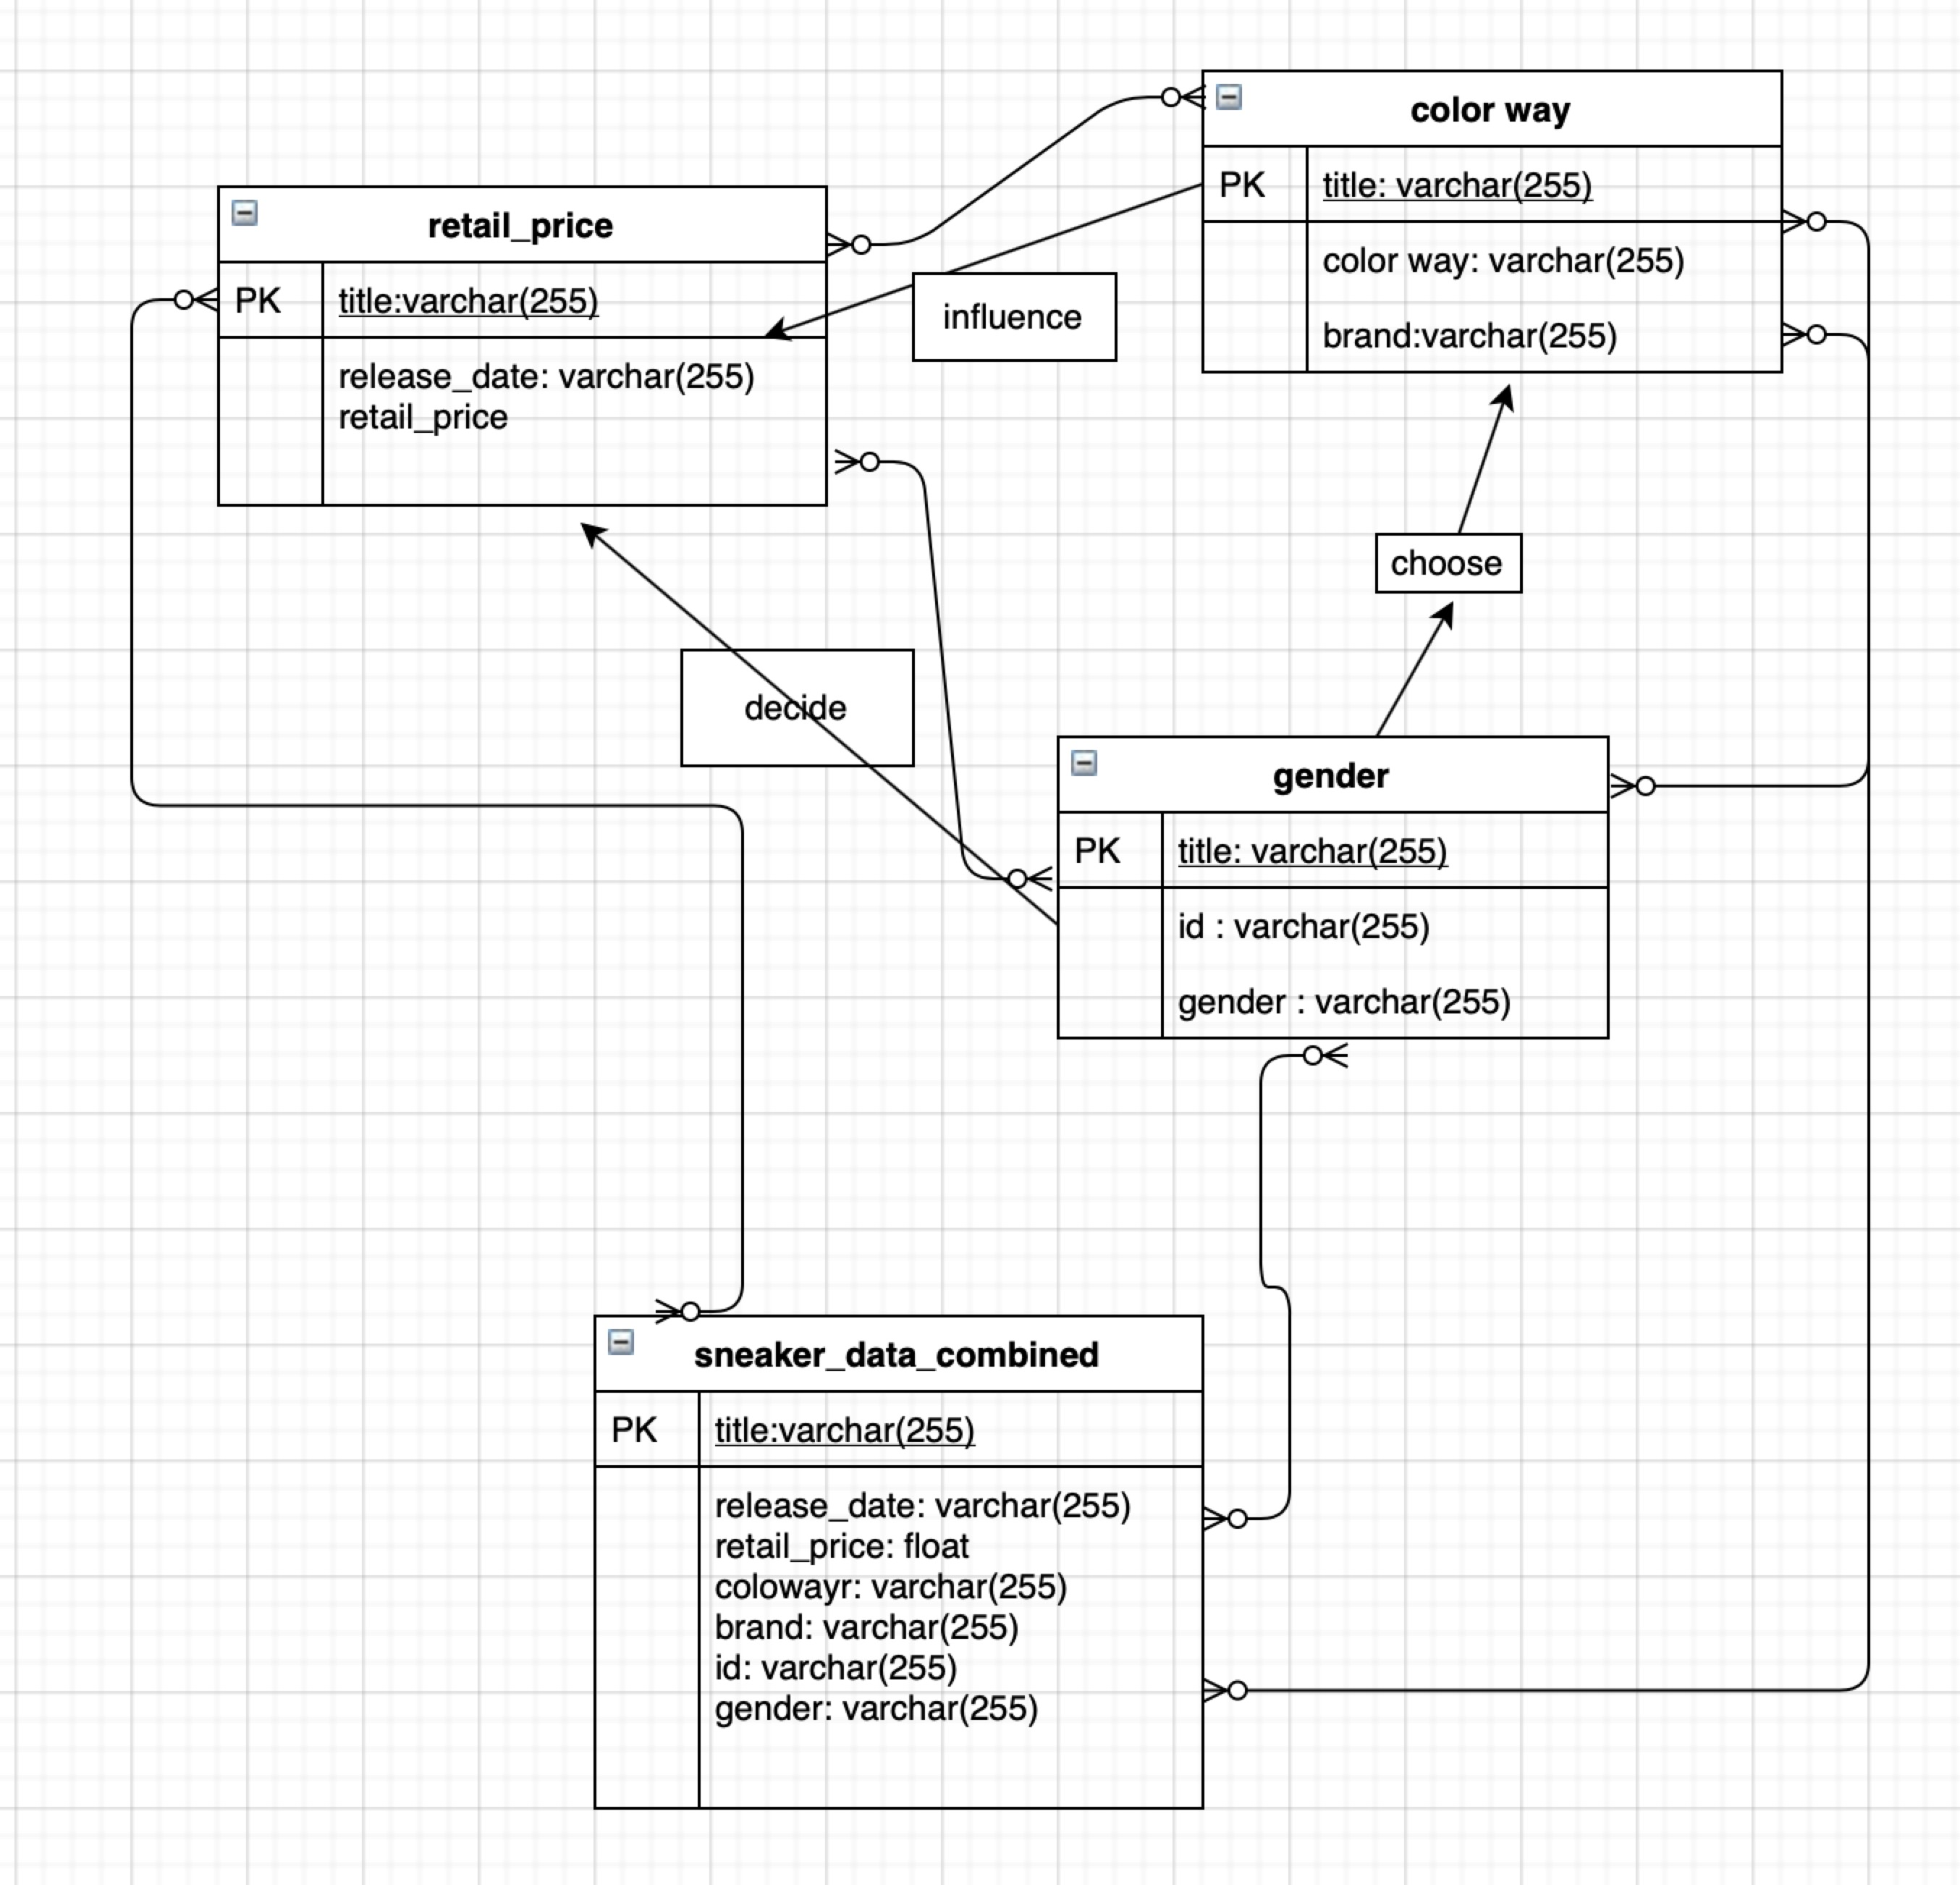

In [6]:
from IPython.display import Image
Image("finaler.jpg")

From the above Entity Relationship graph, we could see that three different tables. which are colorway, retailprice and gender. The primary key of these three tables are the 'title' of the sneakers. Since the combined table contains all the fields of the three tables, we could consider it as the conceptual database schema.

From the relationship between the three tables, we could see that the sneakers with the same color could have different retail prices, and the sneakers of the same price could have different colors. Thus, the relationship of color way and retail_price is Many-to-Many relationship. So are the retail_price - gender, colorway-gender relationship, in other words, three tables are all Many-to-Many relationship.

## Audit Validity/accuracy

First the rawSneakerJsonData table has null values. We cleaned all the null values and at last, there are no duplicates and null values, which means that the database is already cleaned.

## Audit Completness

There are 7 columns contained in the dataset, which are brand name, release date, retail price, color, brand, sneaker id and gender. These data alomst cover all the important entities of sneakers which should have, which satisfy the completness of database.

## Audit Consistency/Uniformity

The datasets are inner related by a common entity, title, which relates all the datasets. Thus, the final combined database is considered to be uniformed and consistent.

# Final Report

file generated and used: sneaker.csv, gender.csv, Sneaker_title.csv, colorway.csv, retailPrice.csv,test1.csv
Data are gathered from three different source, web api,web scraping and raw data. These data are merged to form the final conceptual model.

### Conclusion

In this assignment, first, we gathered data from different source,which are web api, web scraper and raw data. Then the data is cleaned, reformatted and conbined. During the process, the null values are cleaned and the structure and relationship of the data is much more clearer. Finally we formed the conceptual model and draw the Entity Relationship graph to further clarify the model.

### Contribution

Original contribution: 40%
By External source: 20%
Provided by the TA documents : 40%

### Citations:

https://app.swaggerhub.com/apis-docs/tg4solutions/the-sneaker-database/1.0.0#/sneakers/getSneakers
http://www.thesneakerdatabase.com/
https://towardsdatascience.com/web-scraping-using-selenium-and-beautifulsoup-99195cd70a58
http://unclechen.github.io/2016/12/11/python%E5%88%A9%E7%94%A8beautifulsoup+selenium%E8%87%AA%E5%8A%A8%E7%BF%BB%E9%A1%B5%E6%8A%93%E5%8F%96%E7%BD%91%E9%A1%B5%E5%86%85%E5%AE%B9/

### License

Copyright 2019 Weibo Dai Chuhong Yu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In this assignment, first, we gathered data from different source,which are web api, web scraper and raw data. Then the data is cleaned, reformatted and conbined. During the process, the null values are cleaned and the structure and relationship of the data is much more clearer. Finally we formed the conceptual model and draw the Entity Relationship graph to further clarify the model.

### Contribution

Original contribution: 40%
By External source: 20%
Provided by the TA documents : 40%

### Citations:

https://app.swaggerhub.com/apis-docs/tg4solutions/the-sneaker-database/1.0.0#/sneakers/getSneakers
http://www.thesneakerdatabase.com/
https://towardsdatascience.com/web-scraping-using-selenium-and-beautifulsoup-99195cd70a58
http://unclechen.github.io/2016/12/11/python%E5%88%A9%E7%94%A8beautifulsoup+selenium%E8%87%AA%E5%8A%A8%E7%BF%BB%E9%A1%B5%E6%8A%93%E5%8F%96%E7%BD%91%E9%A1%B5%E5%86%85%E5%AE%B9/

### License

Copyright 2019 Weibo Dai Chuhong Yu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.